In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('1802213.csv')

In [3]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200806580,BE trust,2020-02-20 00:00:00,2020.0,1.930493e+09,2020-02-12,20200207,20200212,20200227.0,USD,RV,1.0,NaN,9318.24,20200212.0,NAA8,1.930493e+09,0
1,U001,0200752302,KROGER foundation,2019-10-04 00:00:00,2019.0,1.929881e+09,2019-09-19,20190917,20190919,20191004.0,USD,RV,1.0,NaN,20568.01,20190919.0,NAA8,1.929881e+09,0
2,U001,0200769623,WAL-MAR trust,2019-12-17 00:00:00,2019.0,1.930205e+09,2019-11-30,20191130,20191130,20191215.0,USD,RV,1.0,NaN,1871.45,20191130.0,NAH4,1.930205e+09,0
3,U001,0200290370,BARGAIN systems,2020-03-09 00:00:00,2020.0,1.930548e+09,2020-02-20,20200219,20200220,20200306.0,USD,RV,1.0,NaN,3912.71,20200220.0,NAA8,1.930548e+09,0
4,U001,0200803720,DEC corporation,2020-02-10 00:00:00,2020.0,1.930500e+09,2020-02-08,20200208,20200208,20200208.0,USD,RV,1.0,NaN,19953.85,20200201.0,NAM1,1.930500e+09,0


In [4]:
# , clear date - due in date

In [5]:
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['due_in_date'] = pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['document_create_date'] = pd.to_datetime(df['document_create_date'],format='%Y%m%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df['posting_date'] = pd.to_datetime(df['posting_date'])


df['Target'] = df['clear_date'] - df['due_in_date']

In [6]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
0,U001,0200806580,BE trust,2020-02-20,2020.0,1.930493e+09,2020-02-12,2020-02-07,2020-02-12,2020-02-27,USD,RV,1.0,NaN,9318.24,2020-02-12,NAA8,1.930493e+09,0,-7 days
1,U001,0200752302,KROGER foundation,2019-10-04,2019.0,1.929881e+09,2019-09-19,2019-09-17,2019-09-19,2019-10-04,USD,RV,1.0,NaN,20568.01,2019-09-19,NAA8,1.929881e+09,0,0 days
2,U001,0200769623,WAL-MAR trust,2019-12-17,2019.0,1.930205e+09,2019-11-30,2019-11-30,2019-11-30,2019-12-15,USD,RV,1.0,NaN,1871.45,2019-11-30,NAH4,1.930205e+09,0,2 days
3,U001,0200290370,BARGAIN systems,2020-03-09,2020.0,1.930548e+09,2020-02-20,2020-02-19,2020-02-20,2020-03-06,USD,RV,1.0,NaN,3912.71,2020-02-20,NAA8,1.930548e+09,0,3 days
4,U001,0200803720,DEC corporation,2020-02-10,2020.0,1.930500e+09,2020-02-08,2020-02-08,2020-02-08,2020-02-08,USD,RV,1.0,NaN,19953.85,2020-02-01,NAM1,1.930500e+09,0,2 days


In [7]:
df.drop(['name_customer'],axis=1,inplace=True)
df.drop(['area_business'],axis=1,inplace=True)
df.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
0,U001,0200806580,2020-02-20,2020.0,1.930493e+09,2020-02-12,2020-02-07,2020-02-12,2020-02-27,USD,RV,1.0,9318.24,2020-02-12,NAA8,1.930493e+09,0,-7 days
1,U001,0200752302,2019-10-04,2019.0,1.929881e+09,2019-09-19,2019-09-17,2019-09-19,2019-10-04,USD,RV,1.0,20568.01,2019-09-19,NAA8,1.929881e+09,0,0 days
2,U001,0200769623,2019-12-17,2019.0,1.930205e+09,2019-11-30,2019-11-30,2019-11-30,2019-12-15,USD,RV,1.0,1871.45,2019-11-30,NAH4,1.930205e+09,0,2 days
3,U001,0200290370,2020-03-09,2020.0,1.930548e+09,2020-02-20,2020-02-19,2020-02-20,2020-03-06,USD,RV,1.0,3912.71,2020-02-20,NAA8,1.930548e+09,0,3 days
4,U001,0200803720,2020-02-10,2020.0,1.930500e+09,2020-02-08,2020-02-08,2020-02-08,2020-02-08,USD,RV,1.0,19953.85,2020-02-01,NAM1,1.930500e+09,0,2 days


In [8]:
# Exploratory Data Analysis

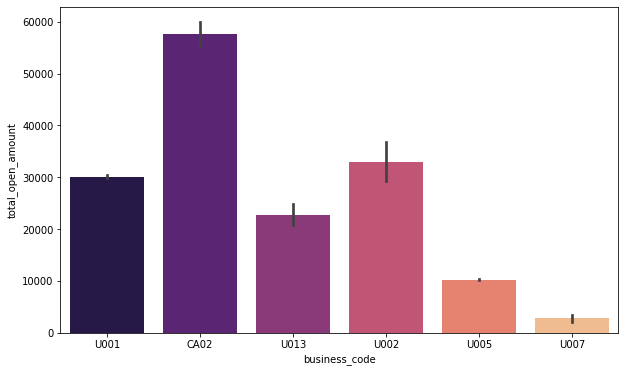

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x='business_code',y='total_open_amount',data=df,palette='magma')

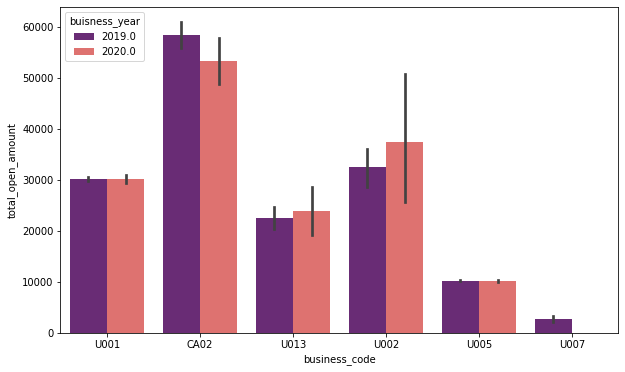

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x='business_code',y='total_open_amount',data=df,hue='buisness_year',palette='magma')

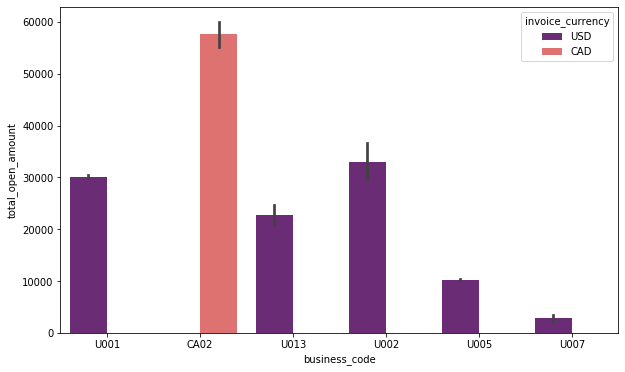

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x='business_code',y='total_open_amount',data=df,hue='invoice_currency',palette='magma')

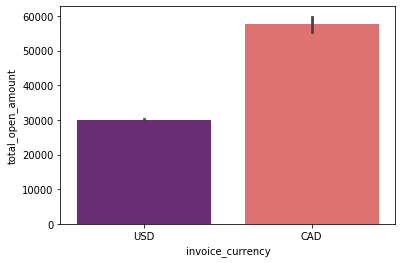

In [12]:
sns.barplot(x='invoice_currency',y='total_open_amount',data=df,palette='magma')

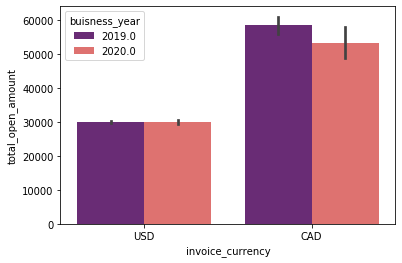

In [13]:
sns.barplot(x='invoice_currency',y='total_open_amount',data=df,hue='buisness_year',palette='magma')

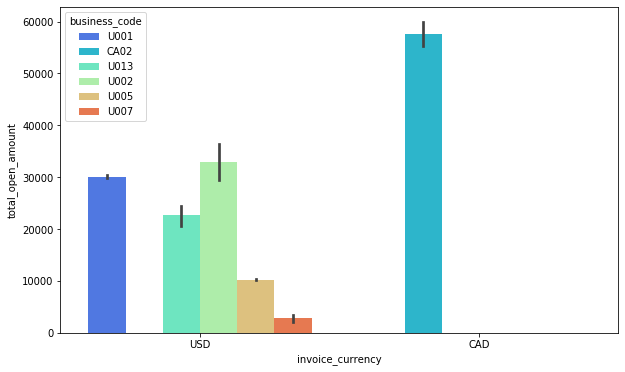

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='invoice_currency',y='total_open_amount',data=df
            ,hue='business_code',palette='rainbow')

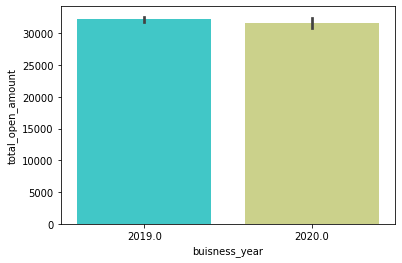

In [16]:
sns.barplot(x='buisness_year',y='total_open_amount',data=df,palette='rainbow')

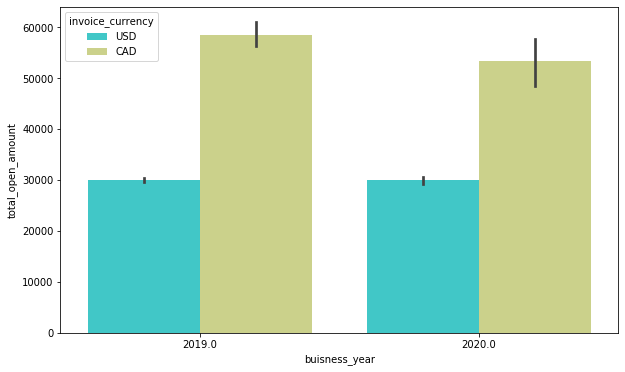

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='buisness_year',y='total_open_amount',data=df
            ,hue='invoice_currency',palette='rainbow')

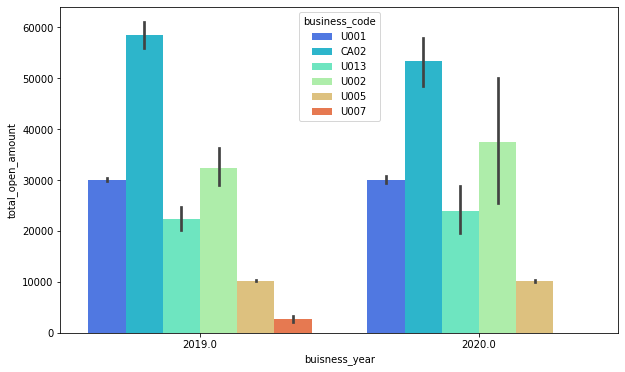

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='buisness_year',y='total_open_amount',data=df
            ,hue='business_code',palette='rainbow')

C:\Users\KIIT\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\KIIT\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


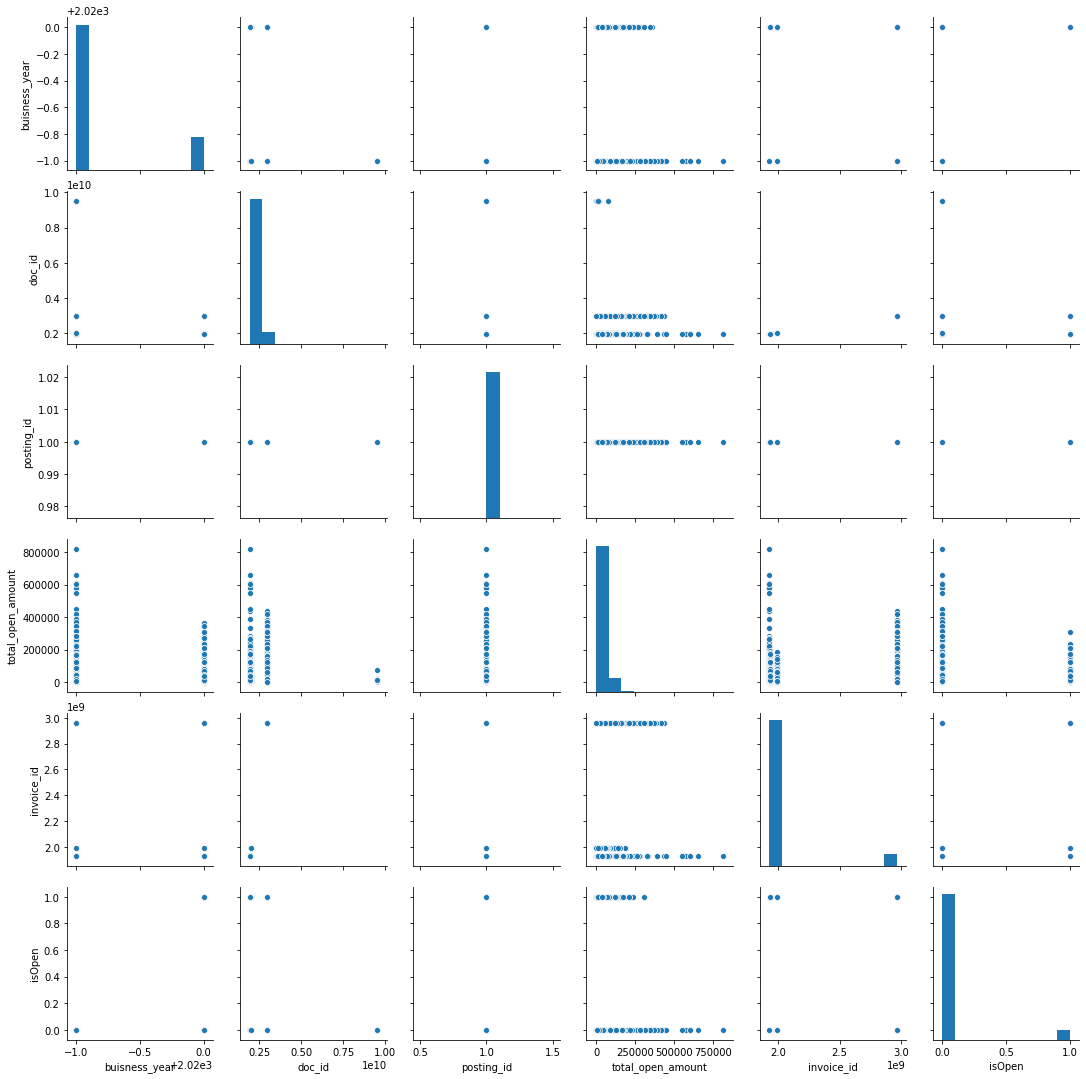

In [18]:
sns.pairplot(df,palette='rainbow')

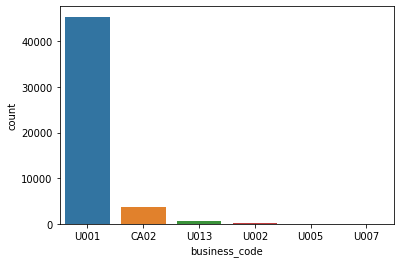

In [19]:
sns.countplot(data=df,x='business_code')

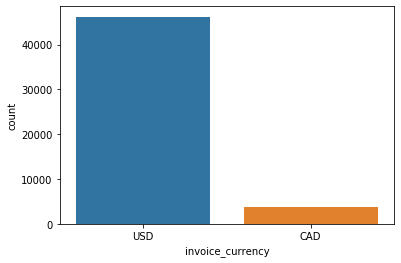

In [20]:
sns.countplot(data=df,x='invoice_currency')

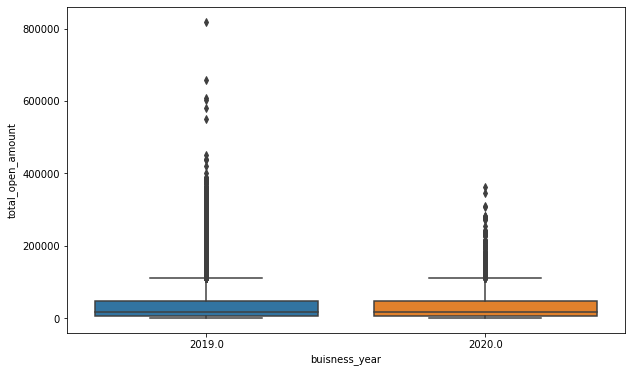

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='buisness_year',y='total_open_amount')

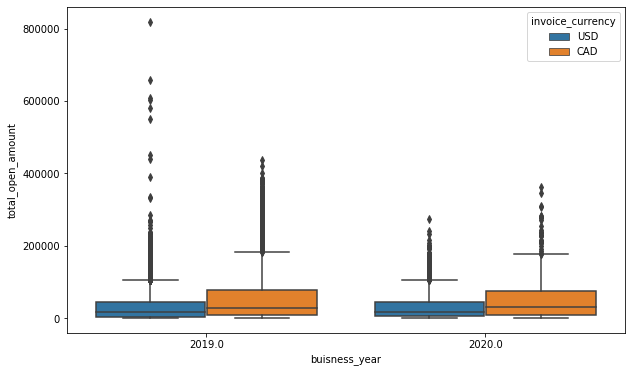

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='buisness_year',y='total_open_amount',hue='invoice_currency')

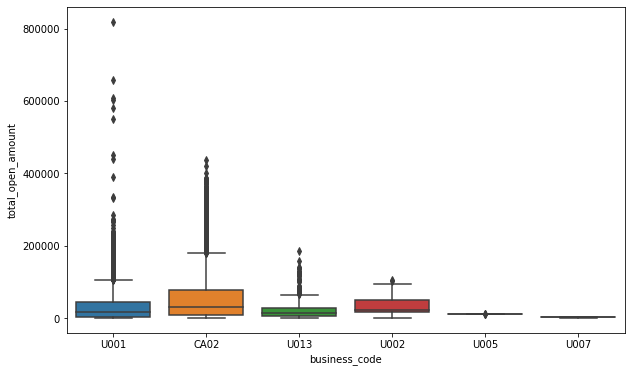

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='business_code',y='total_open_amount')

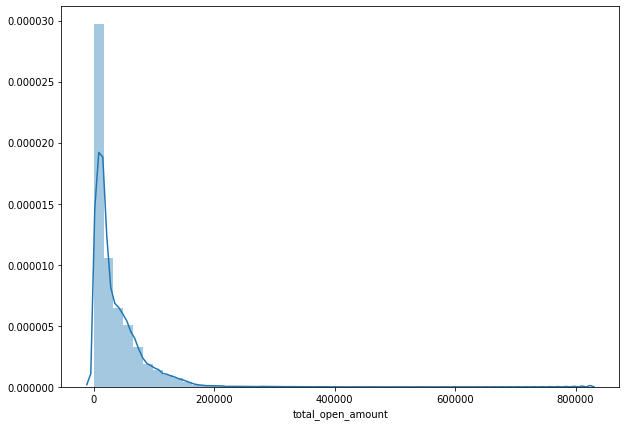

In [24]:
plt.figure(figsize=(10,7))
sns.distplot(df['total_open_amount'],bins=50)

In [25]:
# Converting all the columns into numerical values for machine Learning Processing

In [26]:
def impute_business_code(cols):
    b_code = cols
    if b_code == 'U001':
        return 1
    elif b_code == 'CA02':
        return 2
    elif b_code == 'U013':
        return 3
    elif b_code == 'U002':
        return 4
    elif b_code == 'U005':
        return 5
    elif b_code == 'U007':
        return 0

In [27]:
df['business_code'] = df['business_code'].apply(impute_business_code)#,axis=1

In [28]:
df['invoice_currency'] = pd.get_dummies(df['invoice_currency'],drop_first=True)
df['document type'] = pd.get_dummies(df['document type'],drop_first=True)

In [29]:
df.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
0,1,0200806580,2020-02-20,2020.0,1.930493e+09,2020-02-12,2020-02-07,2020-02-12,2020-02-27,1,0,1.0,9318.24,2020-02-12,NAA8,1.930493e+09,0,-7 days
1,1,0200752302,2019-10-04,2019.0,1.929881e+09,2019-09-19,2019-09-17,2019-09-19,2019-10-04,1,0,1.0,20568.01,2019-09-19,NAA8,1.929881e+09,0,0 days
2,1,0200769623,2019-12-17,2019.0,1.930205e+09,2019-11-30,2019-11-30,2019-11-30,2019-12-15,1,0,1.0,1871.45,2019-11-30,NAH4,1.930205e+09,0,2 days
3,1,0200290370,2020-03-09,2020.0,1.930548e+09,2020-02-20,2020-02-19,2020-02-20,2020-03-06,1,0,1.0,3912.71,2020-02-20,NAA8,1.930548e+09,0,3 days
4,1,0200803720,2020-02-10,2020.0,1.930500e+09,2020-02-08,2020-02-08,2020-02-08,2020-02-08,1,0,1.0,19953.85,2020-02-01,NAM1,1.930500e+09,0,2 days


In [30]:
def impute_cust_payment_terms(cols):
    names = list()
    for ii in df['cust_payment_terms'].unique():
        names.append(ii)
    for ii in range(0,75):
        if cols == names[ii]:
            return ii

In [31]:
df['cust_payment_terms'] = df['cust_payment_terms'].apply(impute_cust_payment_terms)

In [32]:
df.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
0,1,0200806580,2020-02-20,2020.0,1.930493e+09,2020-02-12,2020-02-07,2020-02-12,2020-02-27,1,0,1.0,9318.24,2020-02-12,0,1.930493e+09,0,-7 days
1,1,0200752302,2019-10-04,2019.0,1.929881e+09,2019-09-19,2019-09-17,2019-09-19,2019-10-04,1,0,1.0,20568.01,2019-09-19,0,1.929881e+09,0,0 days
2,1,0200769623,2019-12-17,2019.0,1.930205e+09,2019-11-30,2019-11-30,2019-11-30,2019-12-15,1,0,1.0,1871.45,2019-11-30,1,1.930205e+09,0,2 days
3,1,0200290370,2020-03-09,2020.0,1.930548e+09,2020-02-20,2020-02-19,2020-02-20,2020-03-06,1,0,1.0,3912.71,2020-02-20,0,1.930548e+09,0,3 days
4,1,0200803720,2020-02-10,2020.0,1.930500e+09,2020-02-08,2020-02-08,2020-02-08,2020-02-08,1,0,1.0,19953.85,2020-02-01,2,1.930500e+09,0,2 days


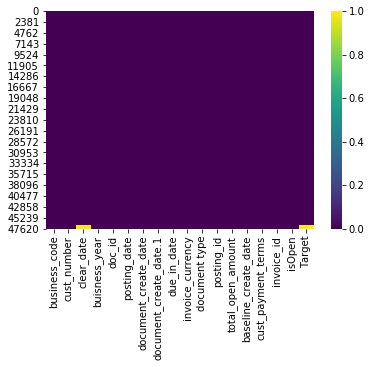

In [33]:
sns.heatmap(df.isnull(),cmap='viridis') 

In [34]:
#def impute_clear_date(cols):
 #   if True:
  #      return df['clear_date'].mean()

In [35]:
#df['clear_date'] = df['clear_date'].isnull().apply(impute_clear_date)

In [36]:
#def impute_target(cols):
 #   if True:
  #      return df['Target'].mean()

In [37]:
#df['Target'] = df['Target'].isnull().apply(impute_target)

In [38]:
df.dropna(inplace=True)

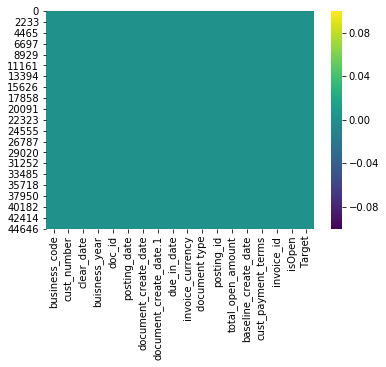

In [39]:
sns.heatmap(df.isnull(),cmap='viridis') 

In [40]:
df.tail()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
46863,1,0200418007,2019-11-07,2019.0,1.930027e+09,2019-10-22,2019-10-17,2019-10-22,2019-11-06,1,0,1.0,2968.44,2019-10-22,0,1.930027e+09,0,1 days
46864,1,0200748108,2019-03-15,2019.0,1.928876e+09,2019-02-28,2019-02-28,2019-02-28,2019-03-15,1,0,1.0,14780.25,2019-02-28,0,1.928876e+09,0,0 days
46865,1,0200974851,2019-11-14,2019.0,1.930071e+09,2019-10-30,2019-10-29,2019-10-30,2019-11-14,1,0,1.0,5788.43,2019-10-30,0,1.930071e+09,0,0 days
46866,1,0200900909,2019-09-11,2019.0,1.929774e+09,2019-08-23,2019-08-22,2019-08-23,2019-09-24,1,0,1.0,19811.58,2019-08-23,14,1.929774e+09,0,-13 days
46867,3,0140103480,2019-08-26,2019.0,1.991825e+09,2019-08-12,2019-08-12,2019-08-12,2019-09-26,1,0,1.0,6195.00,2019-08-12,7,1.991825e+09,0,-31 days


In [41]:
df.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
0,1,0200806580,2020-02-20,2020.0,1.930493e+09,2020-02-12,2020-02-07,2020-02-12,2020-02-27,1,0,1.0,9318.24,2020-02-12,0,1.930493e+09,0,-7 days
1,1,0200752302,2019-10-04,2019.0,1.929881e+09,2019-09-19,2019-09-17,2019-09-19,2019-10-04,1,0,1.0,20568.01,2019-09-19,0,1.929881e+09,0,0 days
2,1,0200769623,2019-12-17,2019.0,1.930205e+09,2019-11-30,2019-11-30,2019-11-30,2019-12-15,1,0,1.0,1871.45,2019-11-30,1,1.930205e+09,0,2 days
3,1,0200290370,2020-03-09,2020.0,1.930548e+09,2020-02-20,2020-02-19,2020-02-20,2020-03-06,1,0,1.0,3912.71,2020-02-20,0,1.930548e+09,0,3 days
4,1,0200803720,2020-02-10,2020.0,1.930500e+09,2020-02-08,2020-02-08,2020-02-08,2020-02-08,1,0,1.0,19953.85,2020-02-01,2,1.930500e+09,0,2 days


In [42]:
def impute_cust_number(cols):
    names = list()
    for ii in df['cust_number'].unique():
        names.append(ii)
    for ii in range(0,1429):
        if cols == names[ii]:
            return ii

In [43]:
df['cust_number'] = df['cust_number'].apply(impute_cust_number)

In [44]:
df.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
0,1,0,2020-02-20,2020.0,1.930493e+09,2020-02-12,2020-02-07,2020-02-12,2020-02-27,1,0,1.0,9318.24,2020-02-12,0,1.930493e+09,0,-7 days
1,1,1,2019-10-04,2019.0,1.929881e+09,2019-09-19,2019-09-17,2019-09-19,2019-10-04,1,0,1.0,20568.01,2019-09-19,0,1.929881e+09,0,0 days
2,1,2,2019-12-17,2019.0,1.930205e+09,2019-11-30,2019-11-30,2019-11-30,2019-12-15,1,0,1.0,1871.45,2019-11-30,1,1.930205e+09,0,2 days
3,1,3,2020-03-09,2020.0,1.930548e+09,2020-02-20,2020-02-19,2020-02-20,2020-03-06,1,0,1.0,3912.71,2020-02-20,0,1.930548e+09,0,3 days
4,1,4,2020-02-10,2020.0,1.930500e+09,2020-02-08,2020-02-08,2020-02-08,2020-02-08,1,0,1.0,19953.85,2020-02-01,2,1.930500e+09,0,2 days


In [45]:
# No Use

print(df['isOpen'].value_counts())
print()
print(df['document type'].value_counts())
print()
print(df['posting_id'].value_counts())

0    46862
Name: isOpen, dtype: int64

0    46862
Name: document type, dtype: int64

1.0    46862
Name: posting_id, dtype: int64


In [46]:
df.drop(['isOpen'],inplace=True,axis=1)
df.drop(['document type'],inplace=True,axis=1)
df.drop(['posting_id'],inplace=True,axis=1)

In [47]:
df.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Target
0,1,0,2020-02-20,2020.0,1.930493e+09,2020-02-12,2020-02-07,2020-02-12,2020-02-27,1,9318.24,2020-02-12,0,1.930493e+09,-7 days
1,1,1,2019-10-04,2019.0,1.929881e+09,2019-09-19,2019-09-17,2019-09-19,2019-10-04,1,20568.01,2019-09-19,0,1.929881e+09,0 days
2,1,2,2019-12-17,2019.0,1.930205e+09,2019-11-30,2019-11-30,2019-11-30,2019-12-15,1,1871.45,2019-11-30,1,1.930205e+09,2 days
3,1,3,2020-03-09,2020.0,1.930548e+09,2020-02-20,2020-02-19,2020-02-20,2020-03-06,1,3912.71,2020-02-20,0,1.930548e+09,3 days
4,1,4,2020-02-10,2020.0,1.930500e+09,2020-02-08,2020-02-08,2020-02-08,2020-02-08,1,19953.85,2020-02-01,2,1.930500e+09,2 days


In [48]:
# posting_date converted

df['posting_date_year'] = df['posting_date'].dt.year
df['posting_date_month'] = df['posting_date'].dt.month
df['posting_date_day'] = df['posting_date'].dt.day

In [49]:
# Clear date converted

df['clear_date_year'] = df['clear_date'].dt.year
df['clear_date_month'] = df['clear_date'].dt.month
df['clear_date_day'] = df['clear_date'].dt.day

In [50]:
# document_create_date converted

df['document_create_date_year'] = df['document_create_date'].dt.year
df['document_create_date_month'] = df['document_create_date'].dt.month
df['document_create_date_day'] = df['document_create_date'].dt.day

In [51]:
# document_create_date.1

df['document_create_date.1_year'] = df['document_create_date.1'].dt.year
df['document_create_date.1_month'] = df['document_create_date.1'].dt.month
df['document_create_date.1_day'] = df['document_create_date.1'].dt.day

In [52]:
# due_in_date converted

df['due_in_date_year'] = df['due_in_date'].dt.year
df['due_in_date_month'] = df['due_in_date'].dt.month
df['due_in_date_day'] = df['due_in_date'].dt.day

In [53]:
# baseline_create_date converted

df['baseline_create_date_year'] = df['baseline_create_date'].dt.year
df['baseline_create_date_month'] = df['baseline_create_date'].dt.month
df['baseline_create_date_day'] = df['baseline_create_date'].dt.day

In [54]:
df.drop(['clear_date'],axis=1,inplace=True)
df.drop(['posting_date'],axis=1,inplace=True)
df.drop(['document_create_date'],axis=1,inplace=True)
df.drop(['document_create_date.1'],axis=1,inplace=True)
df.drop(['due_in_date'],axis=1,inplace=True)
df.drop(['baseline_create_date'],axis=1,inplace=True)
df.head()

,business_code,cust_number,buisness_year,doc_id,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,Target,posting_date_year,...,document_create_date_day,document_create_date.1_year,document_create_date.1_month,document_create_date.1_day,due_in_date_year,due_in_date_month,due_in_date_day,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day
0,1,0,2020.0,1.930493e+09,1,9318.24,0,1.930493e+09,-7 days,2020,...,7,2020,2,12,2020,2,27,2020,2,12
1,1,1,2019.0,1.929881e+09,1,20568.01,0,1.929881e+09,0 days,2019,...,17,2019,9,19,2019,10,4,2019,9,19
2,1,2,2019.0,1.930205e+09,1,1871.45,1,1.930205e+09,2 days,2019,...,30,2019,11,30,2019,12,15,2019,11,30
3,1,3,2020.0,1.930548e+09,1,3912.71,0,1.930548e+09,3 days,2020,...,19,2020,2,20,2020,3,6,2020,2,20
4,1,4,2020.0,1.930500e+09,1,19953.85,2,1.930500e+09,2 days,2020,...,8,2020,2,8,2020,2,8,2020,2,1


In [55]:
def impute_Target(cols):
    if type(cols) == pd._libs.tslibs.timedeltas.Timedelta:
        return cols.days

In [56]:
df['Target'] = df['Target'].apply(impute_Target)

In [57]:
df['Target']

0        -7
1         0
2         2
3         3
4         2
         ..
46863     1
46864     0
46865     0
46866   -13
46867   -31
Name: Target, Length: 46862, dtype: int64

In [58]:
df.head()

,business_code,cust_number,buisness_year,doc_id,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,Target,posting_date_year,...,document_create_date_day,document_create_date.1_year,document_create_date.1_month,document_create_date.1_day,due_in_date_year,due_in_date_month,due_in_date_day,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day
0,1,0,2020.0,1.930493e+09,1,9318.24,0,1.930493e+09,-7,2020,...,7,2020,2,12,2020,2,27,2020,2,12
1,1,1,2019.0,1.929881e+09,1,20568.01,0,1.929881e+09,0,2019,...,17,2019,9,19,2019,10,4,2019,9,19
2,1,2,2019.0,1.930205e+09,1,1871.45,1,1.930205e+09,2,2019,...,30,2019,11,30,2019,12,15,2019,11,30
3,1,3,2020.0,1.930548e+09,1,3912.71,0,1.930548e+09,3,2020,...,19,2020,2,20,2020,3,6,2020,2,20
4,1,4,2020.0,1.930500e+09,1,19953.85,2,1.930500e+09,2,2020,...,8,2020,2,8,2020,2,8,2020,2,1


In [59]:
# ML with Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lm = LinearRegression()

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = df.drop(['Target'],axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [64]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
predictions = lm.predict(X_test)

In [66]:
#predictions = int(predictions)
predictions

array([ 5.01531889e+00, -2.35252405e+00,  1.54376479e-02, ...,
       -2.04206822e-03,  4.22390242e-03,  1.98251074e+00])

In [67]:
pred = list()
for ii in predictions:
    pred.append(int(ii))

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

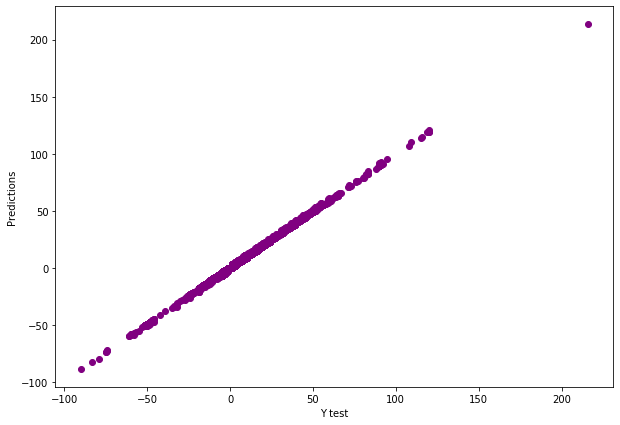

In [69]:
plt.figure(figsize=(10,7))
plt.xlabel('Y test')
plt.ylabel('Predictions')
plt.scatter(y_test,pred,c='purple')

In [70]:
# ML with Random Forrest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc = RandomForestClassifier()

In [73]:
rfc.fit(X_train,y_train)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
rfc_pred = rfc.predict(X_test)

In [75]:
rfc_pred

array([ 0, -4,  0, ...,  0,  0,  1], dtype=int64)

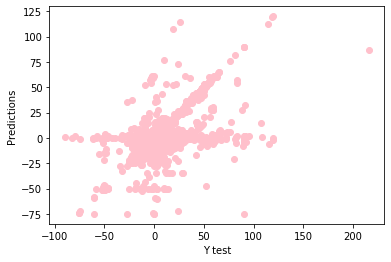

In [76]:
plt.xlabel('Y test')
plt.ylabel('Predictions')
plt.scatter(y_test,rfc_pred,c='pink')